##  1. Загрузка и предобработка данных

***- импортирование библиотек***

In [1]:
import pandas as pd
from scipy.stats import spearmanr
from scipy import stats as st
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy. stats import lognorm
import math as mth

In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
import phik
from phik import resources, report

***- загрузка данных (try, except)***

In [4]:
try:
    data = pd.read_csv('/home/juliya/Загрузки/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [5]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


***- изучить типы данных и при необходимости привести к нужному типу***

На мой взгляд все типы подходят столбцам

***- поиск явных и неявных дубликатов, анализ причин возмикновения, их обработка***

In [7]:
data.duplicated().sum()

0

Прямых дубликатов нет

In [8]:
data['city'].value_counts() #проверяю чтобы не было разных написаний одного города

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [9]:
data['gender'].value_counts() #проверяю чтобы не было разных написаний полов

М    5005
Ж    4995
Name: gender, dtype: int64

In [10]:
data['USERID'].duplicated().sum()

73

Есть дубликаты айди пользователей, хотя они должны быть уникальными значениями. Изучим данные с дублями

In [11]:
data[data['USERID'].duplicated()].pivot_table(index=['city','gender'], 
                                              values=['age', 'products', 'churn', 'EST_SALARY', 'score', 'balance'], 
                                              aggfunc={'age':['median','mean'],
                                                       'products':['median','mean', 'count'],
                                                       'churn':'mean',
                                                       'EST_SALARY':['median','mean'],
                                                       'score':['median','mean'],
                                                       'balance':['median','mean'],
#                                                        'products':'count'
                                                      })

EST_SALARY                   age             balance  \
                           mean     median       mean median         mean   
city      gender                                                            
Рыбинск   Ж        95491.777742   85002.15  48.521739   45.0  611671.1830   
          М       148419.928000  126900.89  34.571429   34.0  403891.0825   
Ярославль Ж       203757.214444  119247.61  41.714286   40.0  946521.7175   
          М       185760.662609  138403.60  41.500000   42.0  533139.4010   

                             churn products                        score  \
                      median  mean    count      mean median        mean   
city      gender                                                           
Рыбинск   Ж       461126.440   0.0       31  1.870968    2.0  834.548387   
          М       412855.475   0.0       10  1.900000    1.5  885.500000   
Ярославль Ж       839474.370   0.0        9  1.444444    1.0  818.333333   
          М       404292.665   0.0       23  1.391304    1.0  847.869565   

                         
                 median  
city      gender         
Рыбинск   Ж       824.0  
          М       895.0  
Ярославль Ж       838.0  
          М       849.0

Проверю эти же данные по всей таблице

In [12]:
data['churn'].mean() #смотрю общий отток по всей таблице

0.182

In [13]:
d = data.pivot_table(index=['city','gender'], 
                                              values=['age', 'products', 'churn', 'EST_SALARY', 'score', 'balance'], 
                                              aggfunc={'age':['median','mean'],
                                                       'products':['median','mean', 'count'],
                                                       'churn':'mean',
                                                       'EST_SALARY':['median','mean'],
                                                       'score':['median','mean'],
                                                       'balance':['median','mean']
                                                      })
d

EST_SALARY                   age              balance  \
                           mean     median       mean median          mean   
city      gender                                                             
Ростов    Ж       104025.129946   92832.55  46.934516   45.0  6.277896e+05   
          М       119500.742606  106887.86  41.143485   39.0  6.985902e+05   
Рыбинск   Ж       125876.498039  104461.66  45.944687   44.0  6.861537e+05   
          М       143960.384280  123713.84  40.576776   39.0  7.484951e+05   
Ярославль Ж       149659.844234  119262.89  44.624826   42.0  7.777995e+05   
          М       175089.201216  138566.30  39.728243   38.0  1.078789e+06   

                                 churn products                        score  \
                      median      mean    count      mean median        mean   
city      gender                                                               
Ростов    Ж       476922.030  0.123978      734  1.862398    2.0  841.486376   
          М       504074.190  0.256223      683  1.853587    2.0  843.874085   
Рыбинск   Ж       481944.440  0.100579     1382  1.806802    2.0  849.678726   
          М       517212.870  0.226961     1313  1.822544    2.0  847.597106   
Ярославль Ж       529276.560  0.141369     2879  1.933658    2.0  848.675582   
          М       563978.145  0.235959     3009  1.864739    2.0  851.608175   

                         
                 median  
city      gender         
Ростов    Ж       841.0  
          М       842.0  
Рыбинск   Ж       853.5  
          М       853.0  
Ярославль Ж       852.0  
          М       859.0

Также просто посмотрим на дубли

In [14]:
data[data['USERID'].duplicated()].reset_index(drop=True).head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
3,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
4,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
5,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
6,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0
7,170312,813.0,Рыбинск,Ж,47.0,3,370027.67,2,0,0,129835.56,0
8,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0
9,211130,918.0,Рыбинск,Ж,55.0,0,NaN,2,1,1,244202.04,0


In [15]:
data[data['USERID'].duplicated()].reset_index(drop=True).tail(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
53,183510,800.0,Рыбинск,Ж,42.0,7,473293.81,2,1,0,54049.88,0
54,200863,832.0,Ярославль,М,42.0,5,620064.73,2,0,0,188054.46,0
55,150667,931.0,Ярославль,М,41.0,0,NaN,1,0,0,261904.44,0
56,202983,942.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0
57,155872,714.0,Рыбинск,Ж,29.0,0,NaN,1,1,0,118052.84,0
58,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
59,217826,790.0,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400.37,0
60,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
61,129785,949.0,Ярославль,М,43.0,0,NaN,1,1,1,166845.37,0
62,160075,824.0,Рыбинск,Ж,57.0,3,355047.33,2,0,0,64351.81,0


Причина возникновения дубликатов не ясна. При этом в Ростове нет дублей юзеров

In [16]:
data = data.drop_duplicates(subset=['USERID']).reset_index(drop=True)

In [17]:
data['USERID'].duplicated().sum()

0

***- анализ пропусков, поиск их причин, при возможности их обработка***

In [18]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Изучим пропуски в столбце balance

In [19]:
bal = data[data['balance'].isna()]

In [20]:
bal.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


In [21]:
bal.pivot_table(index=['city','gender'], 
                                              values=['age', 'products', 'churn', 'EST_SALARY', 'score'], 
                                              aggfunc={'age':['median','mean'],
                                                       'products':['median','mean', 'count'],
                                                       'churn':'mean',
                                                       'EST_SALARY':['median','mean'],
                                                       'score':['median','mean'],
                                                      })

EST_SALARY                    age            churn  \
                           mean      median       mean median      mean   
city      gender                                                          
Ростов    Ж       144358.544273  129937.400  48.945455   49.0  0.000000   
          М       155846.895760  144721.300  38.928000   38.0  0.008000   
Рыбинск   Ж       208355.201450  149318.760  46.022901   44.0  0.007634   
          М       212514.234172  179430.675  40.757962   39.0  0.006369   
Ярославль Ж       238710.289616  171038.710  44.542400   42.0  0.001600   
          М       250571.004211  190357.060  39.149272   37.0  0.008495   

                 products                        score         
                    count      mean median        mean median  
city      gender                                               
Ростов    Ж           110  1.190909    1.0  874.800000  903.5  
          М           125  1.112000    1.0  867.496000  902.0  
Рыбинск   Ж           262  1.137405    1.0  864.072519  900.5  
          М           314  1.210191    1.0  859.417197  897.5  
Ярославль Ж           625  1.155200    1.0  862.982400  902.0  
          М           824  1.158981    1.0  868.184466  903.5

In [22]:
d

EST_SALARY                   age              balance  \
                           mean     median       mean median          mean   
city      gender                                                             
Ростов    Ж       104025.129946   92832.55  46.934516   45.0  6.277896e+05   
          М       119500.742606  106887.86  41.143485   39.0  6.985902e+05   
Рыбинск   Ж       125876.498039  104461.66  45.944687   44.0  6.861537e+05   
          М       143960.384280  123713.84  40.576776   39.0  7.484951e+05   
Ярославль Ж       149659.844234  119262.89  44.624826   42.0  7.777995e+05   
          М       175089.201216  138566.30  39.728243   38.0  1.078789e+06   

                                 churn products                        score  \
                      median      mean    count      mean median        mean   
city      gender                                                               
Ростов    Ж       476922.030  0.123978      734  1.862398    2.0  841.486376   
          М       504074.190  0.256223      683  1.853587    2.0  843.874085   
Рыбинск   Ж       481944.440  0.100579     1382  1.806802    2.0  849.678726   
          М       517212.870  0.226961     1313  1.822544    2.0  847.597106   
Ярославль Ж       529276.560  0.141369     2879  1.933658    2.0  848.675582   
          М       563978.145  0.235959     3009  1.864739    2.0  851.608175   

                         
                 median  
city      gender         
Ростов    Ж       841.0  
          М       842.0  
Рыбинск   Ж       853.5  
          М       853.0  
Ярославль Ж       852.0  
          М       859.0

Видно, что есть пропуски в двух столбцах:
1. Age - тут пропусков немного и я могу удалить эти строки не потеряв значительную часть данных
2. Balance - количество пропусков значительное, заменить их чем-либо сложно, удалять не стоит тк теряется много данных. Пропуски могли возникнуть вследствие технического сбоя при передаче. 

Из интересного в пропусках по столбцу баланса:
1. И мужчины и женщины имеют больший доход, чем по всем данным
2. Очень низкие показатели оттока, чем по всем данным
3. Кредитный скор таже выше, чем по всем данных
4. Возраст идентичен основным данным
5. Используют меньше продуктов чем по всем данным

In [23]:
 # удаляю пропуски по столбцу age
data = data.dropna(subset=['age']).reset_index(drop=True)

***- поиск аномальных значений во всех столбцах***

In [24]:
data['age'].sort_values().unique() #некорректных значений нет

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86.])

In [25]:
data['equity'].value_counts() #некорректных значений нет

0    2554
5    1909
4    1841
3    1532
2    1046
1     771
6     161
7      79
8      17
9      13
Name: equity, dtype: int64

In [26]:
data['products'].value_counts() #некорректных значений нет

2    5095
1    3306
3    1028
4     474
5      19
0       1
Name: products, dtype: int64

In [27]:
data['credit_card'].value_counts() #некорректных значений нет

1    6748
0    3175
Name: credit_card, dtype: int64

In [28]:
data['last_activity'].value_counts() #некорректных значений нет

1    5193
0    4730
Name: last_activity, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  EST_SALARY     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 930.4+ KB


***- привести названия столбцов к одному формату***

In [30]:
data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})

In [31]:
data.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


***- кодирование признаков (например, город)***

In [32]:
df_copy = data.copy() 
data = pd.get_dummies(data, 
                    dummy_na=True, 
                    columns=['gender', 'city'])

data['city'] = df_copy['city'] 
data['gender'] = df_copy['gender'] 

data = data.rename(columns={'gender_Ж':'woman', 
                            'gender_М':'men',
                            'city_Ростов':'rostov',
                            'city_Рыбинск':'rybinsk',
                            'city_Ярославль':'yaroslavl'
                           })

In [33]:
data.head(5)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,woman,men,gender_nan,rostov,rybinsk,yaroslavl,city_nan,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,0,1,0,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,0,1,0,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,0,1,0,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,0,1,0,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,0,1,0,Ярославль,М


Данные подготовлены к дальнейшему анализу

## 2. Исследовательский анализ данных

***- провести корреляционный анализ для пар: наличие кредитной карты - отток, количество продуктов - отток, возраст - количество продуктов, возраст - наличие кредитки, город - отток и тд***

In [34]:
# get the phi_k correlation matrix between all variables
corr = data.phik_matrix()
corr_color = corr.style.background_gradient(axis=None) 
corr_color

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'woman', 'men', 'gender_nan', 'rostov', 'rybinsk', 'yaroslavl', 'city_nan']


/home/juliya/anaconda3/lib/python3.10/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable gender_nan for analysis 1. Dropping this column
  warnings.warn(
/home/juliya/anaconda3/lib/python3.10/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable city_nan for analysis 1. Dropping this column
  warnings.warn(


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,woman,men,rostov,rybinsk,yaroslavl,city,gender
user_id,1.000000,0.065951,0.000000,0.073613,0.033995,0.074595,0.035114,0.066602,0.000000,0.139865,0.060507,0.060507,0.043151,0.000000,0.000000,0.033410,0.060507
score,0.065951,1.000000,0.040418,0.527123,0.170834,0.307467,0.208852,0.053375,0.394681,0.228233,0.070734,0.070734,0.086654,0.031432,0.085366,0.092078,0.070734
age,0.000000,0.040418,1.000000,0.042402,0.024968,0.134099,0.157435,0.089933,0.358802,0.182166,0.285075,0.285075,0.068607,0.058981,0.097588,0.093589,0.285075
equity,0.073613,0.527123,0.042402,1.000000,0.000000,0.441838,0.221563,0.050762,0.285576,0.352317,0.063426,0.063426,0.063575,0.000000,0.056334,0.062820,0.063426
balance,0.033995,0.170834,0.024968,0.000000,1.000000,0.000000,0.000000,0.000000,0.374344,0.024472,0.045448,0.045448,0.000000,0.022924,0.047892,0.039783,0.045448
products,0.074595,0.307467,0.134099,0.441838,0.000000,1.000000,0.460992,0.191261,0.157551,0.441296,0.121758,0.121758,0.074901,0.150527,0.188311,0.227589,0.121758
credit_card,0.035114,0.208852,0.157435,0.221563,0.000000,0.460992,1.000000,0.049818,0.038240,0.202773,0.196099,0.196099,0.152321,0.077811,0.179509,0.074923,0.196099
last_activity,0.066602,0.053375,0.089933,0.050762,0.000000,0.191261,0.049818,1.000000,0.044475,0.262302,0.013206,0.013206,0.000000,0.075726,0.075682,0.030943,0.013206
est_salary,0.000000,0.394681,0.358802,0.285576,0.374344,0.157551,0.038240,0.044475,1.000000,0.049090,0.142757,0.142757,0.136950,0.099819,0.174721,0.170677,0.142757
churn,0.139865,0.228233,0.182166,0.352317,0.024472,0.441296,0.202773,0.262302,0.049090,1.000000,0.219748,0.219748,0.000000,0.042280,0.032464,0.015369,0.219748


In [35]:
churn = corr['churn'].sort_values().reset_index()
churn.columns = ['sign', 'corr']
churn

,sign,corr
0,rostov,0.000000
1,city,0.015369
2,balance,0.024472
3,yaroslavl,0.032464
4,rybinsk,0.042280
5,est_salary,0.049090
6,user_id,0.139865
7,age,0.182166
8,credit_card,0.202773
9,woman,0.219748


Вывод:
1. Корреляция положительная
2. было выявлено, что отток имеет :
- Слабая связь с городом проживания, балансом, уровнем дохода и возрастом
- Более сильную связь с наличием кредитной карты, полом, баллами кредитного скоринга и недавней активностью
- Самые высокие значения связи наблюдались  с баллами собственности(0.35) и количеством используемых продуктов (0.44)


Рассмотрим поподробнее отток по категориям с корреляцией от 0.2

In [36]:
data.pivot_table(index='credit_card', values='churn', aggfunc='mean')

,churn
credit_card,
0,0.257008
1,0.148637


Видно, что отток у тех, кто не имеет кредитку - выше, чем те, у кого её нет

In [37]:
data.pivot_table(index='gender', values='churn', aggfunc='mean')

,churn
gender,
Ж,0.128407
М,0.238028


Отток у мужчин выше, чем у женщин

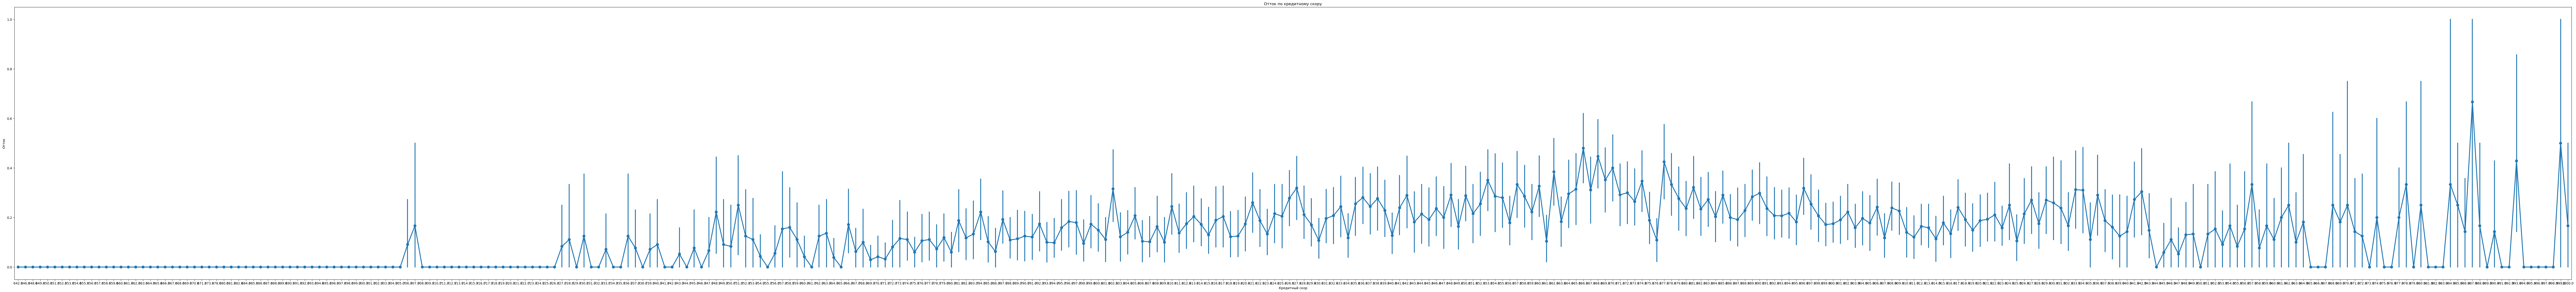

In [38]:
plt.figure(figsize=(140,15))
sns.pointplot(x='score', y='churn', data=data)
plt.xlabel('Кредитный скор') 
plt.ylabel('Отток')
plt.title('Отток по кредитному скору')
plt.show()

Отток при кредитном скоре от 850 до 880 выше

In [39]:
data.pivot_table(index='last_activity', values='churn', aggfunc='mean')

,churn
last_activity,
0,0.114588
1,0.245908


Отток при недавней активности выше

In [40]:
data.pivot_table(index='equity', values='churn', aggfunc='mean')

,churn
equity,
0,0.035239
1,0.120623
2,0.158700
3,0.210183
4,0.252037
5,0.301729
6,0.360248
7,0.468354
8,0.352941


Видим, как при росте баллов собственности растет отток

In [41]:
data.pivot_table(index='products', values='churn', aggfunc='mean')

,churn
products,
0,1.000000
1,0.071083
2,0.191953
3,0.288911
4,0.632911
5,0.421053


Чем больше продуктов используе клиент, тем выше отток. Особенно высокий отток у клиентов с 4мя продуктами

Проверим сколько пользователей используют 0 продуктов

In [42]:
data.query('products == 0')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,woman,men,gender_nan,rostov,rybinsk,yaroslavl,city_nan,city,gender
8901,147837,962.0,79.0,3,NaN,0,0,0,25063.96,1,1,0,0,0,1,0,0,Рыбинск,Ж


На мой взгляд, для анализа 1 значения слишком мало и больше похоже на какую-то ошибку, поэтому далее в расчетах клиент не участвует

In [43]:
data= data.query('user_id != 147837')

Таким образом, проведенный дополнительный анализ оттока подтверждает наличие умеренной корреляции оттока с выделенными столбцами

***- создать базовые графики распределения по столбцам (например, для столбцов age, категории возраста и дохода - отдельные гистограммы)***

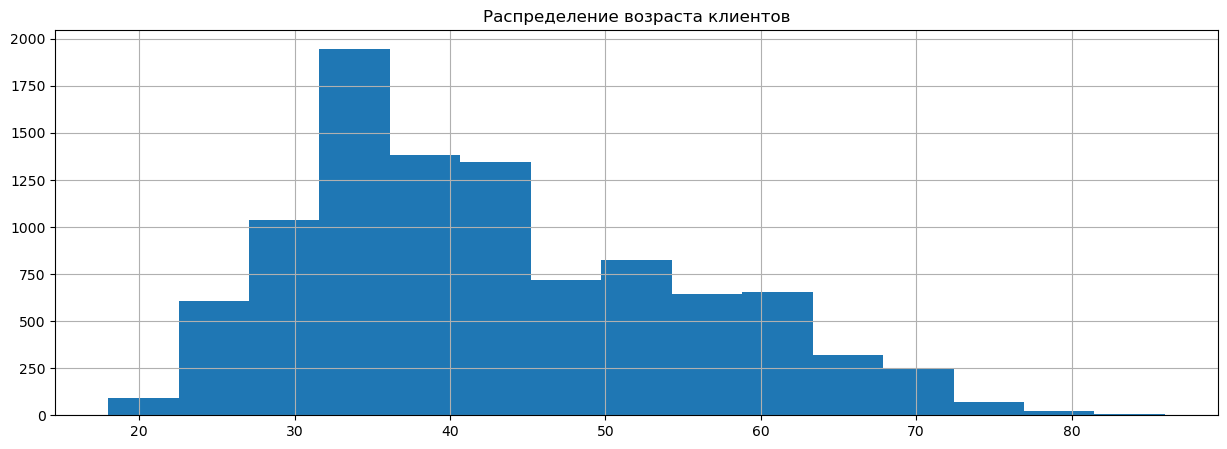

In [44]:
plt.figure(figsize=(15,5))
data['age'].hist(bins=15)
plt.title('Распределение возраста клиентов')
plt.show()

Клиентами банка чаще всего становятся люди от 27 до 45 лет

In [45]:
equity = data['equity'].value_counts().reset_index(drop=True).reset_index()
equity

,index,equity
0,0,2554
1,1,1909
2,2,1841
3,3,1531
4,4,1046
5,5,771
6,6,161
7,7,79
8,8,17
9,9,13


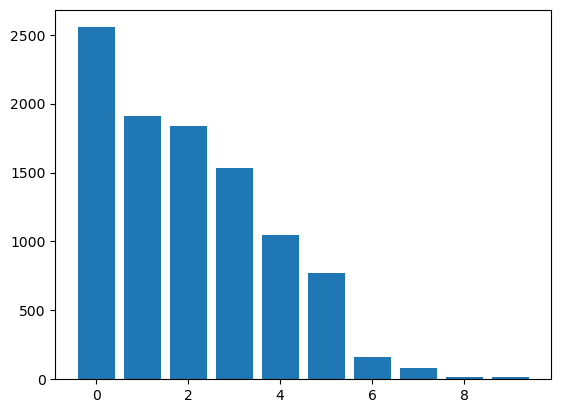

In [46]:
plt.bar(equity['index'], equity['equity'])
plt.show()

Зачастую клиенты банка имеют 0-4 баллов собственности

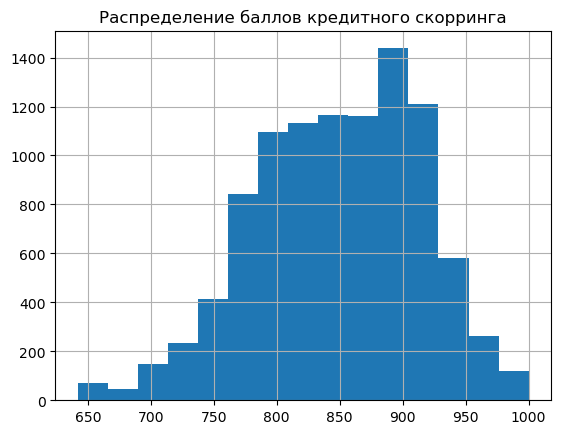

In [47]:
data['score'].hist(bins=15)
plt.title('Распределение баллов кредитного скорринга')
plt.show()

Наиболее встречающийся уровень баллов кредитного скорринга - от 750 до 950. 

In [48]:
data_one = data[data['balance']< 5000000]

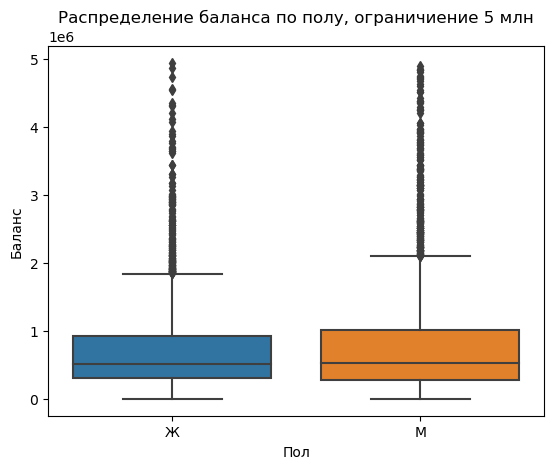

In [49]:
sns.boxplot(data=data_one, y="balance", x="gender")
plt.ylabel('Баланс')
plt.xlabel('Пол')
plt.title('Распределение баланса по полу, ограничиение 5 млн')
plt.show()

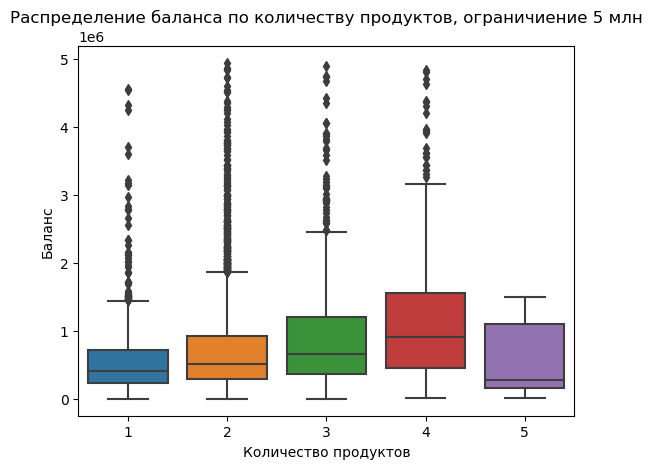

In [50]:
sns.boxplot(data=data_one, y='balance', x='products')
plt.ylabel('Баланс')
plt.xlabel('Количество продуктов')
plt.title('Распределение баланса по количеству продуктов, ограничиение 5 млн')
plt.show()

Вижу много выбросов, которые мешают понять график

In [51]:
data_two = data[data['balance'] < 1000000]

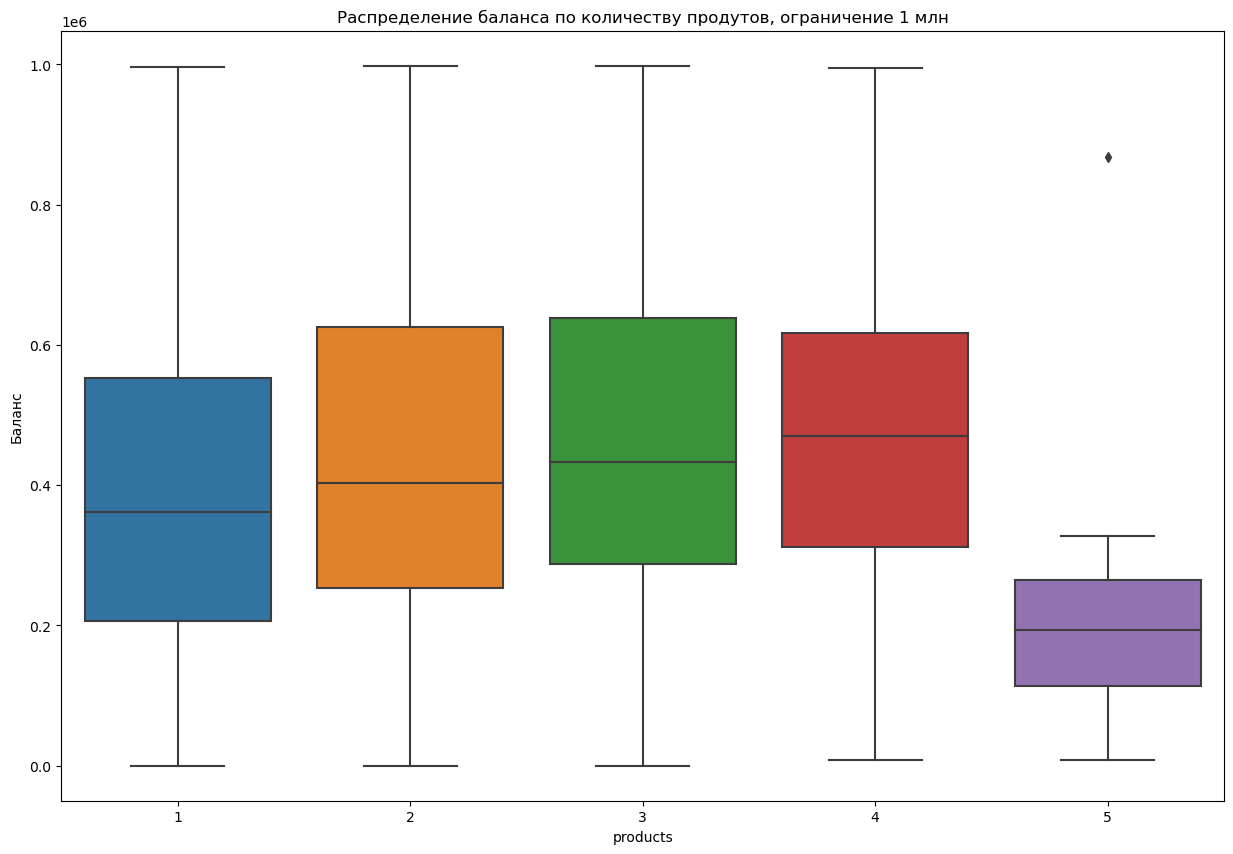

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_two, y='balance', x='products')
plt.ylabel('Баланс')
plt.title('Распределение баланса по количеству продутов, ограничение 1 млн')
plt.show()

Вывод:
1. Если клиент использует 1 продукт банка, то медианный баланс составляет 350 тыс
2. Если клиент использует 2 продукта банка, то медианный баланс составляет 400 тыс
3. Если клиент использует 3 продукта банка, то медианный баланс составляет 450 тыс
4. Если клиент использует 4 продукта банка, то медианный баланс составляет 500 тыс
5. Если клиент использует 5 продуктов банка, то медианный баланс составляет 200 тыс

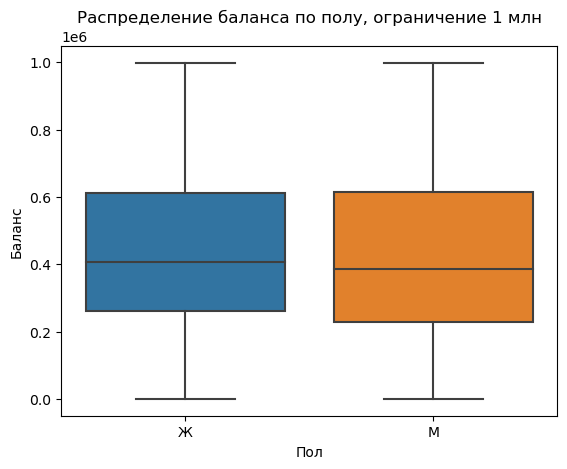

In [53]:
sns.boxplot(data=data_two, y="balance", x="gender")
plt.ylabel('Баланс')
plt.xlabel('Пол')
plt.title('Распределение баланса по полу, ограничение 1 млн')
plt.show()

Видно, что обо пола имеют одинаковые показатели

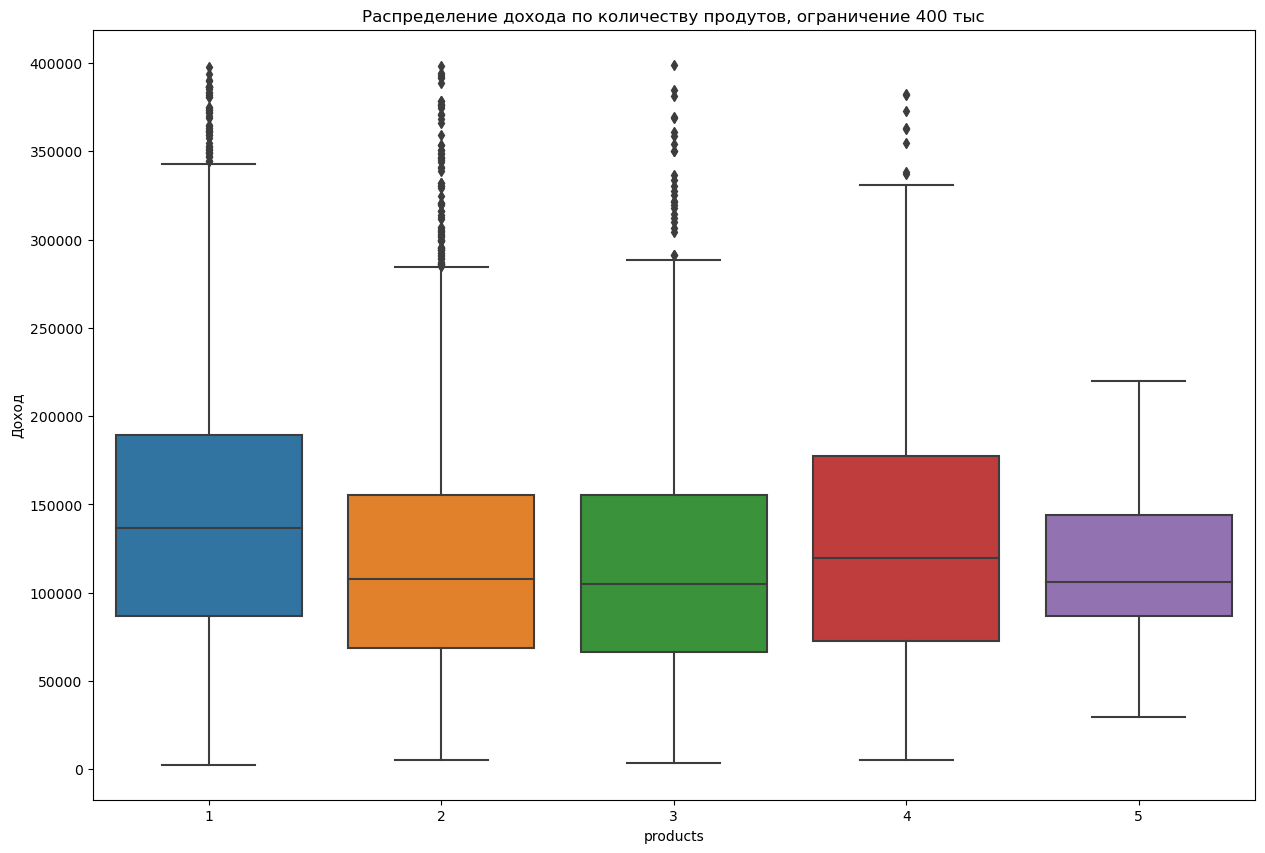

In [54]:
data_three = data[data['est_salary'] < 400000]

plt.figure(figsize=(15,10))
sns.boxplot(data=data_three, y='est_salary', x='products') #hue='balance')
plt.ylabel('Доход')
plt.title('Распределение дохода по количеству продутов, ограничение 400 тыс')
plt.show()

1. Если клиент использует 1 продукт банка, то медианный баланс составляет 350 тыс, а доход - 100 тыс
2. Если клиент использует 2 продукта банка, то медианный баланс составляет 400 тыс, а доход 100 тыс
3. Если клиент использует 3 продукта банка, то медианный баланс составляет 450 тыс, доход - 100 тыс
4. Если клиент использует 4 продукта банка, то медианный баланс составляет 500 тыс, доход - 120 тыс
5. Если клиент использует 5 продуктов банка, то медианный баланс составляет 200 тыс, доход - 100 тыс

дополняю базовые графики

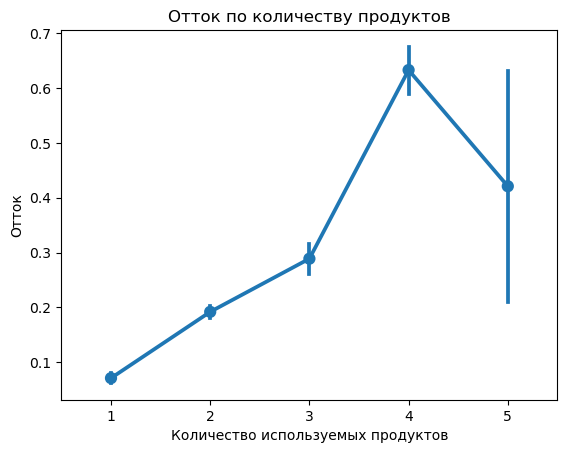

In [55]:
sns.pointplot(x='products', y='churn', data=data)
plt.xlabel('Количество используемых продуктов') 
plt.ylabel('Отток')
plt.title('Отток по количеству продуктов')
plt.show()

Вывод:
1. Отток с количеством используемых продуктов растет, но также немного падает на уровне 5 продуктов

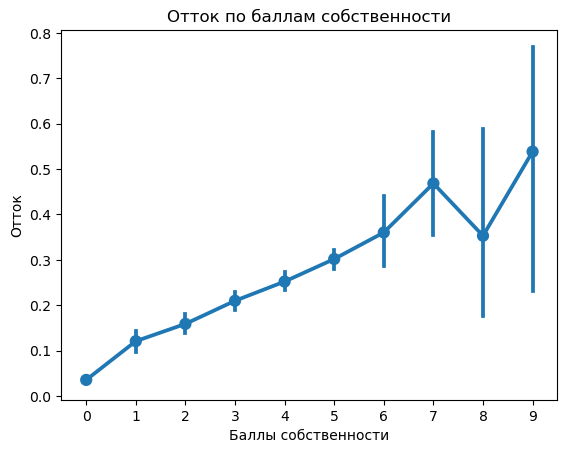

In [56]:
sns.pointplot(x='equity', y='churn', data=data)
plt.xlabel('Баллы собственности') 
plt.ylabel('Отток')
plt.title('Отток по баллам собственности')
plt.show()

На графике видим подтверждение умеренной корреляции (0,3) - чем выше один показатель, тем выше второй

In [57]:
#plt.figure(figsize=(15,5))
#sns.kdeplot(data, x='age',hue='credit_card',fill=True, common_norm=False,
#   alpha=.5, linewidth=0,)
#plt.xlabel('Возраст')
#plt.show()

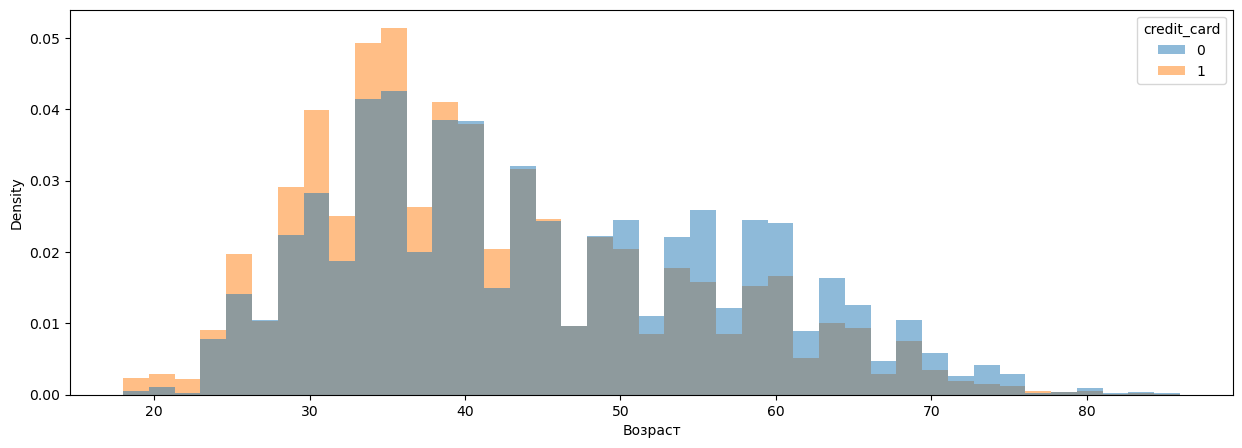

In [58]:
plt.figure(figsize=(15,5))
sns.histplot(data, x='age',hue='credit_card',fill=True, common_norm=False, alpha=.5, linewidth=0,stat='density')
plt.xlabel('Возраст')
plt.show()

Выводы:
1. Большая часть клиентов от 26 до 40 лет используют кредитную карту
2. В возрасте от 50 лет клиенты меньше используют кредитку

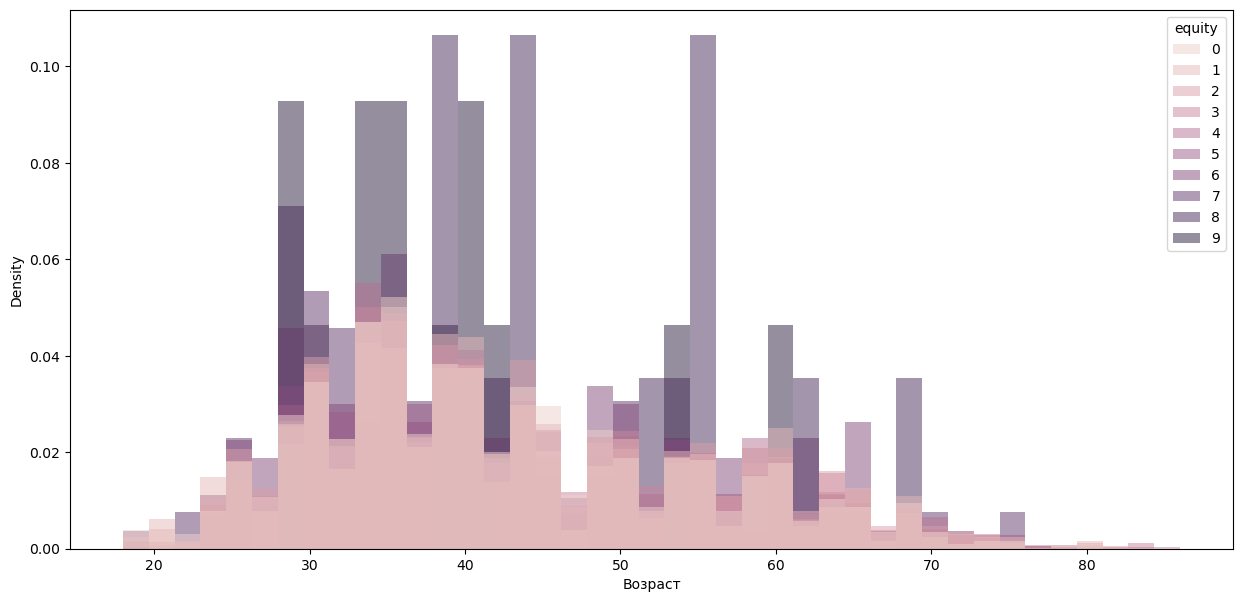

In [59]:
plt.figure(figsize=(15,7))
sns.histplot(data, x='age',hue='equity',fill=True, common_norm=False,
   alpha=.5, linewidth=0,stat='density')
plt.xlabel('Возраст')
plt.show()

Клиенты в возрасте от 30 до 40 лет часто имеют больше баллов собствености. После 45 до 50 количество баллов становится немного меньше

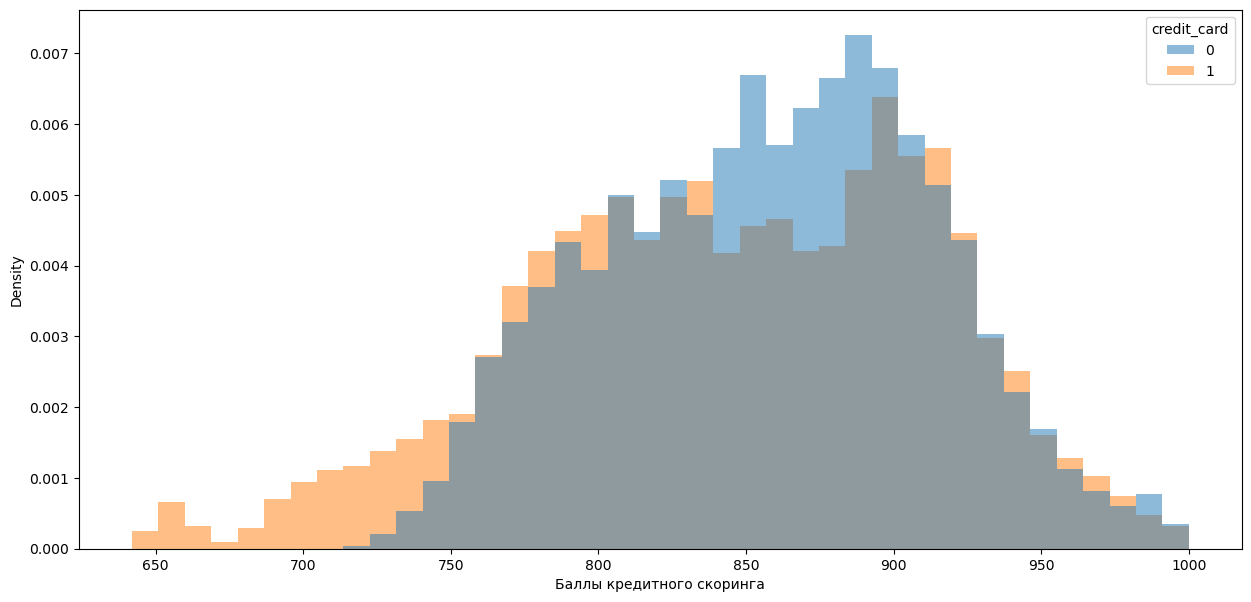

In [60]:
plt.figure(figsize=(15,7))
sns.histplot(data, x='score',hue='credit_card',fill=True, common_norm=False,
   alpha=.5, linewidth=0,stat='density')
plt.xlabel('Баллы кредитного скоринга')
plt.show()

Большинство клиентов с кредитной картой имеют 700-800 баллов кредитного скроллинга. А те, кто не имеет,то 800-900 баллов

***- создать категории клиентов (например, по уровню дохода)***

In [61]:
def est_salary(salary):
    """
    Возвращает  категорию дохода, используя правила:
    - 'до 50 тыс' (усы боксплота начинаются чуть выше нуля и заканчиваются на уровне 70-80 тысяч, категория до 
    50 - это фактически минимум дохода)
    - от 50 до 100 тыс (от 70-80 начиется нижний квартиль и 75% клиентов находятся от этого квартиля)
    - от 100 до 150 тыс (от 100 до 150 тысяч находится медиана для разных количеств используемых продуктов, да и в
    целом медиана по всем данным находится в этом диапазоне, как и среднее)
    - от 150 тыс (у части использованных продуктов тут находится верхний квартиль, у другой части верхний квартиль
    чуть выше)
    Разделение по категориям на основании бокплота по доходу по количеству продуктов
    """
    
    if salary <= 50000:
        return 'до 50 тыс'
    if salary <= 100000 and salary>50000:
        return 'от 50 до 100 тыс'
    if salary <= 150000 and salary>100000:
        return 'от 100 до 150 тыс'
    return 'от 150 тыс' 


In [62]:
data['est_salary'].mean()

147898.87357186052

In [63]:
data['est_salary'].median()

119735.43

In [64]:
data['est_salary'].min()

2546.3

In [65]:
data['est_salary'].max()

1395064.45

In [66]:
data['category_salary'] = data['est_salary'].apply(est_salary)
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,woman,men,gender_nan,rostov,rybinsk,yaroslavl,city_nan,city,gender,category_salary
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,0,1,0,0,Рыбинск,Ж,от 100 до 150 тыс
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,0,1,0,Ярославль,Ж,от 150 тыс
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,0,1,0,Ярославль,М,от 50 до 100 тыс


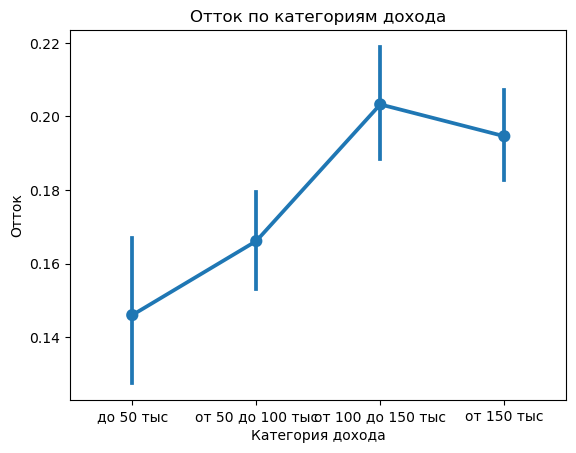

In [67]:
sns.pointplot(x='category_salary', y='churn', data=data, order=['до 50 тыс', 
                                                                "от 50 до 100 тыс", 
                                                                "от 100 до 150 тыс", 
                                                                "от 150 тыс"])
plt.xlabel('Категория дохода') 
plt.ylabel('Отток')
plt.title('Отток по категориям дохода')
plt.show()

Видим, что чем больше доход, тем выше отток

In [68]:
def balance(balance):
    """
    Возвращает  категорию баланса, используя правила:
    - 'до 100 тыс' (клиенты, использующие 5 продуктов имеют баланс от 0р и нижний квартиль в 100 тыс)
    - от 100 до 200 тыс (клиенты, использующие 1-4 продукта имеют усы от 0р до 200 тысяч)
    - от 200 до 400 тыс (клиенты, использующие 1-4 продукта имеют медиану в 400 тыс)
    - от 400 до 600 тыс (клиенты, использующие 1-4 продукта имеют верхний квартиль в 600 тыс)
    - от 600 тыс (клиенты, использующие 1-4 продукта имеют усы от 600 тыс)
    Разделение по категориям на основании бокплота по балансу по количеству продуктов
    """
    
    if balance <= 100000:
        return 'до 100 тыс'
    if balance <= 200000 and balance>100000:
        return 'от 100 до 200 тыс'
    if balance <= 400000 and balance>200000:
        return 'от 200 до 400 тыс'
    if balance <= 600000 and balance>400000:
        return 'от 400 до 600 тыс'
    return 'от 600 тыс' 

data['category_balance'] = data['balance'].apply(balance)
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,men,gender_nan,rostov,rybinsk,yaroslavl,city_nan,city,gender,category_salary,category_balance
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,...,0,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс,до 100 тыс
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,...,0,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс,от 600 тыс
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,...,0,0,0,1,0,0,Рыбинск,Ж,от 100 до 150 тыс,от 600 тыс
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,...,0,0,0,0,1,0,Ярославль,Ж,от 150 тыс,от 600 тыс
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,...,1,0,0,0,1,0,Ярославль,М,от 50 до 100 тыс,до 100 тыс


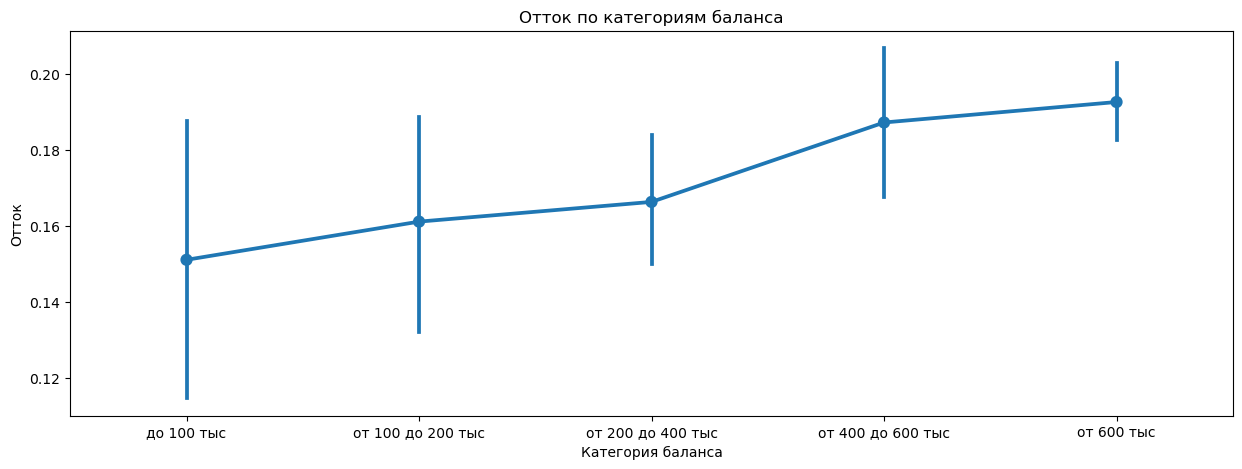

In [69]:
plt.figure(figsize=(15,5))
sns.pointplot(x='category_balance', y='churn', data=data, order = ['до 100 тыс',
                                                                  'от 100 до 200 тыс',
                                                                  'от 200 до 400 тыс',
                                                                  'от 400 до 600 тыс',
                                                                  'от 600 тыс'])
plt.xlabel('Категория баланса') 
plt.ylabel('Отток')
plt.title('Отток по категориям баланса')
plt.show()

Оттоки у клиентов разных категорий могут пересекаться. Можно точно сказать только границы - от 0.12 до 0.21. Также видно, что с ростом баланса растет отток

In [70]:
def age(age):
    """
    Возвращает  категорию возраста, используя правила:
    - до 23
    - от 24 до 35
    - от 35 до 48
    - от 49 до 60
    - от 60
    Разделение по категориям на основании гистограммы с возрастом
    """
    
    if age >=18 and age<23:
        return 'до 23'
    if age >=24 and age<35:
        return 'от 24 до 35'
    if age >=35  and age<48:
        return 'от 35 до 48'
    if age >=49  and age<60:
        return 'от 49 до 60'
    else:
        return 'от 60' 

data['category_age'] = data['age'].apply(age)
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,gender_nan,rostov,rybinsk,yaroslavl,city_nan,city,gender,category_salary,category_balance,category_age
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,...,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс,до 100 тыс,от 24 до 35
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,...,0,0,1,0,0,Рыбинск,Ж,от 50 до 100 тыс,от 600 тыс,от 35 до 48
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,...,0,0,1,0,0,Рыбинск,Ж,от 100 до 150 тыс,от 600 тыс,от 24 до 35
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,...,0,0,0,1,0,Ярославль,Ж,от 150 тыс,от 600 тыс,от 49 до 60
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,...,0,0,0,1,0,Ярославль,М,от 50 до 100 тыс,до 100 тыс,от 24 до 35


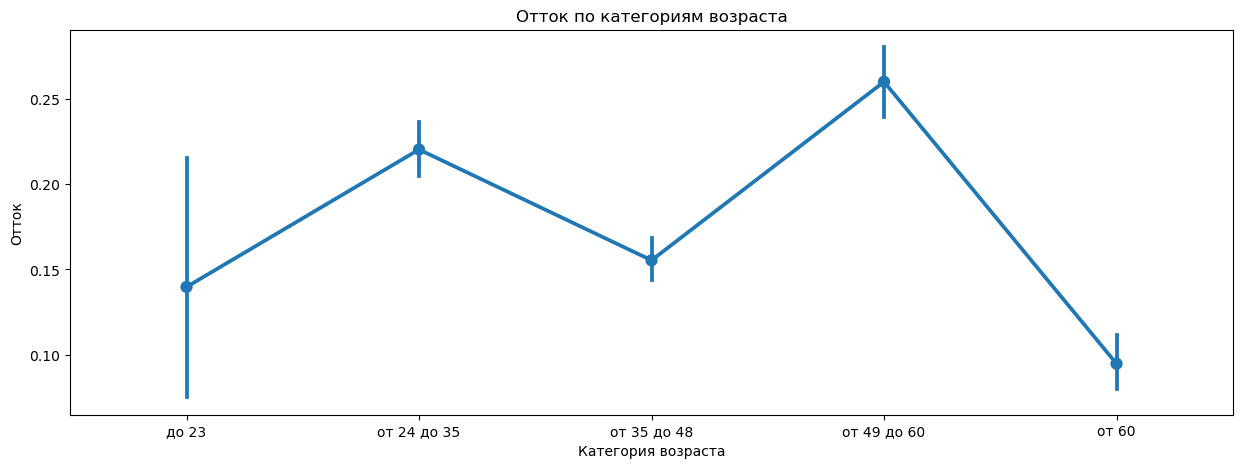

In [71]:
plt.figure(figsize=(15,5))
sns.pointplot(x='category_age', y='churn', data=data, order = ['до 23',
                                                               'от 24 до 35',
                                                              'от 35 до 48',
                                                              'от 49 до 60',
                                                              "от 60"])
plt.xlabel('Категория возраста') 
plt.ylabel('Отток')
plt.title('Отток по категориям возраста')
plt.show()

    Вижу, что в разных категориях возраста - разный отток. Самый высокий в возрасте от 49 до 60, самый низкий = от 60 лет

<hr style="border: 2px solid orange;" />

***- собрать типичные портреты клиентов в сводную таблицу (беру признак, например, возраст, и считаю средние и медианные величины - доход, возраст, количество используемых продуктов тд)***

In [72]:
def pivot(column):
    
    
    # таблица с оттоком
    pivot_churn = data.pivot_table(index=column, 
                             columns=['gender','city'] ,
                             values='churn', 
                             aggfunc='mean')
    pivot_churn = pivot_churn.reset_index()
    pivot_churn.columns = [column,
                     'Ростов, Ж, отток', 
                     "Рыбинск, Ж, отток", 
                     "Ярославль, Ж, отток", 
                     "Ростов, М, отток", 
                     "Рыбинск, М, отток", 
                     "Ярославль, М, отток"]
    pivot_churn = pivot_churn.style.background_gradient(axis=None)
    
    # таблица с количеством продуктов
    pivot_product = data.pivot_table(index=column, 
                             columns=['gender','city'] ,
                             values='products', 
                             aggfunc='mean') #если брать медиану, то везду будет по 2 продукта
    pivot_product = pivot_product.reset_index()
    pivot_product.columns = [column,
                    'Ростов, Ж, продукты', 
                     "Рыбинск, Ж, продукты", 
                     "Ярославль, Ж, продукты", 
                     "Ростов, М, продукты", 
                     "Рыбинск, М, продукты", 
                     "Ярославль, М, продукты"]

    pivot_product = pivot_product.style.background_gradient(axis=None) 
    
    # таблица с баллами собственности
    pivot_equity = data.pivot_table(index=column,
                               columns=['city', 'gender'],
                               values= 'equity',
                               aggfunc='median').reset_index()
    pivot_equity.columns = [column,
                        "Ростов, баллы собственности, Ж",
                        "Рыбинск, баллы собственности, Ж",
                        "Яровлавль, баллы собственности, Ж",
                        "Ростов, баллы собственности, М",
                        "Рыбинск, баллы собственности, М",
                        "Яровлавль, баллы собственности, М"]
    pivot_equity = pivot_equity.style.background_gradient(axis=None) 
    
     # таблица с возрастом
    pivot_age = data.pivot_table(index=column,
                               columns=['city', 'gender'],
                               values= 'age',
                               aggfunc='median').reset_index()
    pivot_age.columns = [column,
                       'Ростов, возраст, Ж',
                        "Рыбинск, возраст, Ж",
                        "Ярославль, возраст, Ж",
                        'Ростов, возраст, М',
                        "Рыбинск, возраст, М",
                        "Ярославль, возраст, М"
                        ]
    pivot_age = pivot_age.style.background_gradient(axis=None) 
    
    # таблица с баллами кредитного скоринга
    pivot_score = data.pivot_table(index=column,
                               columns=['city', 'gender'],
                               values= 'score',
                               aggfunc='median').reset_index()
    pivot_score.columns = [column,
                        "Ростов, скорринг, Ж",
                        "Рыбинск, скорринг, Ж",
                        "Яровлавль, скорринг, Ж",
                        "Ростов, скорринг, М",
                        "Рыбинск, скорринг, М",
                        "Яровлавль, скорринг, М"]
    pivot_score = pivot_score.style.background_gradient(axis=None) 
    
    
    return pivot_churn, pivot_product, pivot_equity, pivot_age, pivot_score

pivot_churn, pivot_product, pivot_equity, pivot_age, pivot_score = pivot('category_balance')
display(pivot_churn, pivot_product, pivot_equity, pivot_age, pivot_score)

,category_balance,"Ростов, Ж, отток","Рыбинск, Ж, отток","Ярославль, Ж, отток","Ростов, М, отток","Рыбинск, М, отток","Ярославль, М, отток"
0,до 100 тыс,0.045455,0.078431,0.076923,0.189189,0.206349,0.216667
1,от 100 до 200 тыс,0.111111,0.092784,0.129032,0.270833,0.266667,0.165854
2,от 200 до 400 тыс,0.118750,0.081560,0.122677,0.234848,0.240343,0.225673
3,от 400 до 600 тыс,0.112676,0.137931,0.133333,0.235849,0.260116,0.269592
4,от 600 тыс,0.135838,0.103208,0.155652,0.275000,0.215343,0.244887


,category_balance,"Ростов, Ж, продукты","Рыбинск, Ж, продукты","Ярославль, Ж, продукты","Ростов, М, продукты","Рыбинск, М, продукты","Ярославль, М, продукты"
0,до 100 тыс,1.636364,1.784314,1.868132,1.837838,1.873016,1.925000
1,от 100 до 200 тыс,2.000000,1.927835,2.021505,1.875000,1.766667,1.882927
2,от 200 до 400 тыс,1.912500,1.861702,2.042751,2.030303,1.978541,1.981366
3,от 400 до 600 тыс,1.887324,1.945813,2.101149,2.000000,2.023121,2.087774
4,от 600 тыс,1.817919,1.730823,1.848672,1.744444,1.728129,1.796017


,category_balance,"Ростов, баллы собственности, Ж","Рыбинск, баллы собственности, Ж","Яровлавль, баллы собственности, Ж","Ростов, баллы собственности, М","Рыбинск, баллы собственности, М","Яровлавль, баллы собственности, М"
0,до 100 тыс,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,от 100 до 200 тыс,1.000000,2.000000,1.000000,2.000000,1.500000,2.000000
2,от 200 до 400 тыс,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
3,от 400 до 600 тыс,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
4,от 600 тыс,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


,category_balance,"Ростов, возраст, Ж","Рыбинск, возраст, Ж","Ярославль, возраст, Ж","Ростов, возраст, М","Рыбинск, возраст, М","Ярославль, возраст, М"
0,до 100 тыс,33.500000,28.000000,30.000000,28.000000,33.000000,30.000000
1,от 100 до 200 тыс,39.000000,32.500000,38.000000,34.000000,38.000000,34.000000
2,от 200 до 400 тыс,43.000000,37.000000,43.000000,39.000000,40.000000,37.000000
3,от 400 до 600 тыс,45.000000,42.000000,42.000000,39.000000,42.000000,39.000000
4,от 600 тыс,48.000000,41.000000,46.000000,40.000000,43.000000,39.000000


,category_balance,"Ростов, скорринг, Ж","Рыбинск, скорринг, Ж","Яровлавль, скорринг, Ж","Ростов, скорринг, М","Рыбинск, скорринг, М","Яровлавль, скорринг, М"
0,до 100 тыс,795.000000,800.000000,806.000000,805.000000,801.000000,801.500000
1,от 100 до 200 тыс,796.000000,802.000000,813.000000,808.000000,817.000000,814.000000
2,от 200 до 400 тыс,822.500000,825.000000,829.500000,821.000000,822.000000,815.000000
3,от 400 до 600 тыс,840.500000,822.000000,849.000000,840.000000,838.000000,831.000000
4,от 600 тыс,868.500000,882.000000,885.000000,886.000000,885.000000,891.000000


In [73]:
data.groupby('gender').agg({'products':['mean', 'median']})

products       
            mean median
gender                 
Ж       1.889338    2.0
М       1.854125    2.0

In [74]:
data.groupby(['gender', 'city']).agg({'churn':'mean'})

churn
gender city               
Ж      Ростов     0.122783
       Рыбинск    0.102222
       Ярославль  0.141861
М      Ростов     0.256223
       Рыбинск    0.228879
       Ярославль  0.237856

In [75]:
new = data.groupby('products').agg({'churn':'mean'})
new = new.style.background_gradient(axis=None) 
new

,churn
products,
1,0.071083
2,0.191953
3,0.288911
4,0.632911
5,0.421053


In [76]:
new = data.groupby('last_activity').agg({'churn':'mean'})
new = new.style.background_gradient(axis=None) 
new

,churn
last_activity,
0,0.114401
1,0.245908


In [77]:
new = data.groupby(['last_activity', 'credit_card']).agg({'churn':'mean'})
new = new.style.background_gradient(axis=None) 
new

In [78]:
new = data.groupby(['category_balance', 'credit_card', 'last_activity']).agg({'churn':'mean'})
new = new.style.background_gradient(axis=None) 
new

In [79]:
pivot_salary = data.pivot_table(index= 'category_balance', 
                             columns=['gender','city'] ,
                             values='est_salary', 
                             aggfunc='median').reset_index()
pivot_salary.columns = ['category_balance',
                     'Ростов, Ж, доход', 
                     "Рыбинск, Ж, доход", 
                     "Ярославль, Ж, доход", 
                     "Ростов, М, доход", 
                     "Рыбинск, М, доход", 
                     "Ярославль, М, доход"]
pivot_salary = pivot_salary.style.background_gradient(axis=None)
pivot_salary

,category_balance,"Ростов, Ж, доход","Рыбинск, Ж, доход","Ярославль, Ж, доход","Ростов, М, доход","Рыбинск, М, доход","Ярославль, М, доход"
0,до 100 тыс,48019.395000,60416.260000,77339.740000,80957.020000,71663.520000,86007.110000
1,от 100 до 200 тыс,72086.850000,86288.230000,94618.155000,72317.635000,91977.380000,89550.210000
2,от 200 до 400 тыс,76690.485000,83389.760000,90139.065000,88714.030000,98063.210000,96221.070000
3,от 400 до 600 тыс,90550.930000,92338.670000,103614.780000,99396.740000,98425.590000,105883.260000
4,от 600 тыс,106620.420000,127511.860000,141365.950000,131995.825000,149255.400000,167295.335000


 Вывод:
 1. У мужчин отток выше. 
 2. Мужчины и женщины используют примерно одинаковое количество продуктов банка. При этом категория с балансом от 400 до 600 немного больше использует продуктов. А категория с балансом от 600 тысяч - меньше
 3. Количество баллов собственности растет с увеличением баланса. Но при балансе от 600 тыс - немного снижается. При балансе до 200 тысяч наблюдаю небольшую разницу между мужчинавми и женщинами, у мужчин немного больше баллов
 4. Баланс от 200 тысяч достигается не ранее 32 лет, а от 600 тысяч не ранее 39 лет
 5. С ростом баланса количество баллов скорринга увеличивается. Наибольший балл имеют мужчины, проживающие в Ярославле с балансом от 600 тыс
 6. Женщины имеют меньше дохода, чем мужчины. С ростом дохода растет баланс
 
 Дополнительно:
 1. Клиенты, использующие 0,4,5 продуктов имеют более высокий отток
 2. Клиенты, которые были более активные в последнее время имеют более высокий отток
 3. Клиенты, имеющие кредитную карту, имеют больший отток, чем те, кто не имеет
 4. Клиент с балансом от 600 тысяч, имеющие кредитную карту и которые недавно проявляли активность имеют высокий отток - 0.4

Общий вывод по исследовательскому анализу:
1. Слабая положительная корреляция оттока с городами, балансом, доходом, возрастом, наличию кредитки, полу, кредитному скору. Умеренная связь с остальными столбцами
2. Клиентами банка чаще всего становятся люди от 27 до 45 лет
3. Зачастую клиенты имеют 0-4 баллов собсвенности
4. Наиболее встречающийся уровень баллов скорринга - от 750 до 950
5. Баланс одинаковый и у мужчин и у женщин (согласно боксплот)
6. Доход и количество продуктов:
 - Если клиент использует 1 продукт банка, то медианный баланс составляет 350 тыс, а доход - 100 тыс
 - Если клиент использует 2 продукта банка, то медианный баланс составляет 400 тыс, а доход 100 тыс
 - Если клиент использует 3 продукта банка, то медианный баланс составляет 450 тыс, доход - 100 тыс
 - Если клиент использует 4 продукта банка, то медианный баланс составляет 500 тыс, доход - 120 тыс
 - Если клиент использует 5 продуктов банка, то медианный баланс составляет 200 тыс, доход - 100 тыс
7. Отток с количеством используемых продуктов растет
8. Чем больше баллов собственности,  тем выше отток
9. Большая часть клиентов от 26 до 38 используют кредитную карту. В возрасте от 50 клиенты меньше используют кредитку
10. Клиенты в возрасте от 30 до 40 лет часто имеют больше баллов собственности. После 45 до 50 лет количество баллов немного меньше
11. Большинство клиентов с кредитной картой имеют 700-800 баллов кредитного скорринга. А, те кто не имеет кредитку, то 800-900 баллов
12. Чем выше доход клиента, тем выше отток
13. Оттоку у разных категорий баланса могут пересекаться, однока границы - от 0.12 до 0.21. Также видно, что с ростом баланса отток растет
14. У мужчин отток выше.
15. Мужчины и женщины используют примерно одинаковое количество продуктов банка. При этом категория с балансом от 400 до 600 немного больше использует продуктов. А категория с балансом от 600 тысяч - меньше
16. Количество баллов собственности растет с увеличением баланса. Но при балансе от 600 тыс - немного снижается. При балансе до 200 тысяч наблюдаю небольшую разницу между мужчинавми и женщинами, у мужчин немного больше баллов
17. Баланс от 200 тысяч достигается не ранее 32 лет, а от 600 тысяч не ранее 39 лет
18. С ростом баланса количество баллов скорринга увеличивается. Наибольший балл имеют мужчины, проживающие в Ярославле с балансом от 600 тыс
19. Женщины имеют меньше дохода, чем мужчины. С ростом дохода растет баланс
20. Клиенты, использующие 0,4,5 продуктов имеют более высокий отток
21. Клиенты, которые были более активные в последнее время имеют более высокий отток
22. Клиенты, имеющие кредитную карту, имеют больший отток, чем те, кто не имеет
23. Клиент с балансом от 600 тысяч, имеющие кредитную карту и которые недавно проявляли активность имеют высокий отток - 0.4
24. в разных категориях возраста - разный отток. Самый высокий в возрасте от 49 до 60, самый низкий = от 60 лет


## 3. Проверка статистических гипотез

***- сформировать выборки и обосновать выбор стат теста***


***- выдвинуть 2 гипотезы и проверить их по стат критерию (наиболее подходящему по случаю)***

Нулевая гипотеза - у мужчин и женщин (средний) отток равен

Альтернативная гипотеза - у мужчин (средний отток) выше, чем у женщин


Выбор теста основан на:
1. сравнение средних двух генеральных совокупностей, которые не зависят друг от друга
2. выборки большие
3. нормальность распределение выборок (проверяю немного ниже тестом Шапиро Уилка)

Итог - выбираю тест ман уитни

In [80]:
alpha = 0.05

men = data[data['gender'] == 'М']
woman = data[data['gender'] == 'Ж']

print(men['churn'].count())
print(woman['churn'].count())

4970
4952


In [81]:
stat, p = st.shapiro(men['churn']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')


Statistics=0.528, p-value=0.000
Отклонить гипотезу о нормальности


In [82]:
stat, p = st.shapiro(woman['churn']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.393, p-value=0.000
Отклонить гипотезу о нормальности


Выборки распределены не нормально, поэтомы я не могу использовать ttest

In [83]:
successes = [men['churn'].sum(), woman['churn'].sum()]
trials = [men['churn'].count(),woman['churn'].count()]

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

In [84]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  


In [85]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [86]:
if p1>p2:
    print('Отток у мужчин выше')
else:
    print('Отток у женщин выше')

Отток у мужчин выше


Проверим 2ю гипотезу

Нулевая гипотеза- клиенты, использующие кредитную карту, имеют тот же отток, как и те, кто не использует

Альтернативная гипотеза - клиенты, использующие кредитную карту, имеют больший отток, чем те, кто не использует

In [87]:
credit_card = data.query('credit_card == 1')['churn']
no_credit_card = data.query('credit_card == 0')['churn']

print(credit_card.count())
print(no_credit_card.count())

6748
3174


In [88]:
stat, p = st.shapiro(credit_card) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')


Statistics=0.424, p-value=0.000
Отклонить гипотезу о нормальности


/home/juliya/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
stat, p = st.shapiro(no_credit_card) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')


Statistics=0.544, p-value=0.000
Отклонить гипотезу о нормальности


In [90]:
successes = [credit_card.sum(), no_credit_card.sum()]
trials = [credit_card.count(), no_credit_card.count()]

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [91]:
if credit_card.mean()>no_credit_card.mean():
    print('Отток у пользователей, которые имеют кредитные карты, выше')
else:
    print('Отток у пользователей, которые не имеют кредитные карты, выше')

Отток у пользователей, которые не имеют кредитные карты, выше


## 4. Сегментация

***- определить ключевые сегменты аудитории, посчитать для них показатель оттока и др показатели по имеющимся данным***

***- из выделенных сегментов акцентировать внимание на выбивающийся показатель оттока (не равный среднему/медиане)***

In [92]:
pivot_men = men.pivot_table(index=['category_salary', 'city'], 
                            columns='category_balance', 
                            values='churn', 
                            aggfunc='mean')
pivot_men = pivot_men.style.background_gradient(axis=None)
pivot_men

In [93]:
pivot_men = men.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='age', 
                            aggfunc='median')
pivot_men = pivot_men.style.background_gradient(axis=None)
pivot_men

In [94]:
pivot_men = men.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='products', 
                            aggfunc='median')
pivot_men = pivot_men.style.background_gradient(axis=None)
pivot_men

In [95]:
pivot_men = men.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='credit_card', 
                            aggfunc='mean')
pivot_men = pivot_men.style.background_gradient(axis=None)
pivot_men

In [96]:
pivot_men = men.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='age', 
                            aggfunc='count')
pivot_men = pivot_men.style.background_gradient(axis=None)
pivot_men

Далее подберу неотточные сегменты

In [97]:
pivot_woman = woman.pivot_table(index=['category_salary', 'city'], 
                            columns='category_balance', 
                            values='churn', 
                            aggfunc='mean')
pivot_woman = pivot_woman.style.background_gradient(axis=None)
pivot_woman

In [98]:
pivot_woman = woman.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='age', 
                            aggfunc='count')
pivot_woman = pivot_woman.style.background_gradient(axis=None)
pivot_woman

In [99]:
pivot_woman = woman.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='age', 
                            aggfunc='median')
pivot_woman = pivot_woman.style.background_gradient(axis=None)
pivot_woman

In [100]:
pivot_woman = woman.pivot_table(index=['category_salary', 'city'], 
                             columns='category_balance', 
                            values='credit_card', 
                            aggfunc='mean')
pivot_woman = pivot_woman.style.background_gradient(axis=None)
pivot_woman

далее сформирую ещё один сегмент уже без деления по полу

In [101]:
last_category = data.pivot_table(index=['category_age', 'credit_card'], 
                 columns='equity', 
                 values='churn', 
                 aggfunc=['mean'])

last_category = last_category.style.background_gradient(axis=None)
last_category

In [102]:
last_category = data.pivot_table(index=['category_age', 'credit_card'], 
                 columns='equity', 
                 values='churn', 
                 aggfunc=['count'])

last_category = last_category.style.background_gradient(axis=None)
last_category

In [103]:
last_category = data.pivot_table(index=['category_age', 'credit_card'], 
                 columns='equity', 
                 values='products', 
                 aggfunc=['median'])

last_category = last_category.style.background_gradient(axis=None)
last_category

In [104]:
last_category = data.pivot_table(index=['category_age', 'credit_card'], 
                 columns='equity', 
                 values='est_salary', 
                 aggfunc=['median'])

last_category = last_category.style.background_gradient(axis=None)
last_category

In [105]:
last_category = data.pivot_table(index=['category_age', 'credit_card'], 
                 columns='equity', 
                 values='balance', 
                 aggfunc=['median'])

last_category = last_category.style.background_gradient(axis=None)
last_category

In [106]:
data['churn'].mean()

0.18322918766377747

***В результате выделяю следующие категории в пределах риска, на которые оптимально тратить время компании:***
1. Мужчины, Ярославль, Доход от 150 тысяч, баланс от 600 тысяч, используют кредитку с высокой вероятностью (0,7), средний возраст 39 лет. Размер категории - 1080 клиентов. Отток - 0.23
2. Мужчины и женщины, от 24 до 35 лет, с кредитной картщй, имеют 5 баллов собственности. Отток - 0.31. Размер категории - 328 клиентов

Не отточный сегмент:
1. Женщины, доход от 50 до 100 тысяч, баланс от 600 тысяч, 49 лет. Чаще используют кредитку, чем не используют её (0.6). Размер категории - 368 клиентов. Отток - 0.12


Вопрос:
1. На встрече была рекомендация, чтобы сегменты были разнообразными и охватывали большую часть клиентов и при этом размер сегмента от 300 до 1000 клиентов. Это звучит очень противоречиво. Если брать те, же 300 клиентов из рекомендации, то это всего лишь 3% от всего объема данных, и это уже не охватывает большую часть клиентов

## Сформировать рекомендации для каждого из выделенных выделяющихся сегментов

Презентация <https://disk.yandex.ru/i/nmwlr0Hvobukew>

**Что было сделано:***
1. Выполнена подготовка данных к анализу
2. Исследовательский анализ данных (изучение корреляции, построение графиков, создание дополнительных столбцов, составлен портрет клиента)
3. Проверка статистических гипотез
4. Сегментация клиентов по оттоку

***Выводы по этапу исследовательского анализа:***
1. Слабая положительная корреляция оттока с городами, балансом, доходом, возрастом, наличию кредитки, полу, кредитному скору. Умеренная связь с остальными столбцами
2. Клиентами банка чаще всего становятся люди от 27 до 45 лет
3. Зачастую клиенты имеют 0-4 баллов собсвенности
4. Наиболее встречающийся уровень баллов скорринга - от 750 до 950
5. Баланс одинаковый и у мужчин и у женщин (согласно боксплот)
6. Доход и количество продуктов:
 - Если клиент использует 1 продукт банка, то медианный баланс составляет 350 тыс, а доход - 100 тыс
 - Если клиент использует 2 продукта банка, то медианный баланс составляет 400 тыс, а доход 100 тыс
 - Если клиент использует 3 продукта банка, то медианный баланс составляет 450 тыс, доход - 100 тыс
 - Если клиент использует 4 продукта банка, то медианный баланс составляет 500 тыс, доход - 120 тыс
 - Если клиент использует 5 продуктов банка, то медианный баланс составляет 200 тыс, доход - 100 тыс
7. Отток с количеством используемых продуктов растет
8. Чем больше баллов собственности,  тем выше отток
9. Большая часть клиентов от 26 до 38 используют кредитную карту. В возрасте от 50 клиенты меньше используют кредитку
10. Клиенты в возрасте от 30 до 40 лет часто имеют больше баллов собственности. После 45 до 50 лет количество баллов немного меньше
11. Большинство клиентов с кредитной картой имеют 700-800 баллов кредитного скорринга. А, те кто не имеет кредитку, то 800-900 баллов
12. Чем выше доход клиента, тем выше отток
13. Оттоку у разных категорий баланса могут пересекаться, однока границы - от 0.12 до 0.21. Также видно, что с ростом баланса отток растет
14. У мужчин отток выше.
15. Мужчины и женщины используют примерно одинаковое количество продуктов банка. При этом категория с балансом от 400 до 600 немного больше использует продуктов. А категория с балансом от 600 тысяч - меньше
16. Количество баллов собственности растет с увеличением баланса. Но при балансе от 600 тыс - немного снижается. При балансе до 200 тысяч наблюдаю небольшую разницу между мужчинавми и женщинами, у мужчин немного больше баллов
17. Баланс от 200 тысяч достигается не ранее 32 лет, а от 600 тысяч не ранее 39 лет
18. С ростом баланса количество баллов скорринга увеличивается. Наибольший балл имеют мужчины, проживающие в Ярославле с балансом от 600 тыс
19. Женщины имеют меньше дохода, чем мужчины. С ростом дохода растет баланс
20. Клиенты, использующие 0,4,5 продуктов имеют более высокий отток
21. Клиенты, которые были более активные в последнее время имеют более высокий отток
22. Клиенты, имеющие кредитную карту, имеют больший отток, чем те, кто не имеет
23. Клиент с балансом от 600 тысяч, имеющие кредитную карту и которые недавно проявляли активность имеют высокий отток - 0.4
24. в разных категориях возраста - разный отток. Самый высокий в возрасте от 49 до 60, самый низкий = от 60 лет

***В результате проведения стат теста было выявлено:***
1. Мужчины имеют больший отток, чем женщины
2. Кредитная карте влияет на отток клиентов и без кредитной карты отток выше

***Какие сегменты удалось выделить:***
1. Мужчины, Ярославль, Доход от 150 тысяч, баланс от 600 тысяч, используют кредитку с высокой вероятностью (0,7), средний возраст 39 лет. Размер категории - 1080 клиентов. Отток - 0.23
2. Мужчины и женщины, от 24 до 35 лет, с кредитной картщй, имеют 5 баллов собственности. Отток - 0.31. Размер категории - 328 клиентов


Не отточный сегмент:
3. Женщины, доход от 50 до 100 тысяч, баланс от 600 тысяч, 49 лет. Чаще используют кредитку, чем не используют её (0.6). Размер категории - 368 клиентов. Отток - 0.12
